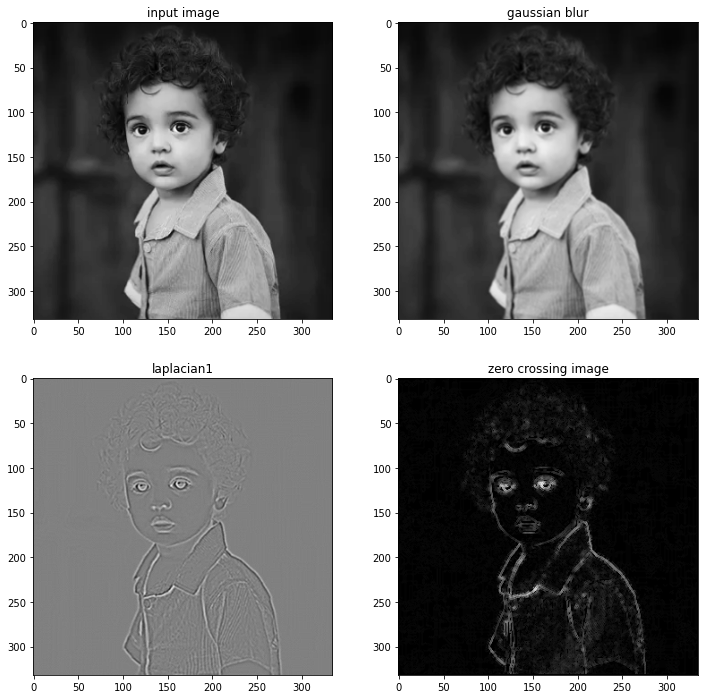

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zero_crossing(image):
    z_c_image = np.zeros(image.shape)
    
    # For each pixel, count the number of positive
    # and negative pixels in the neighborhood
    
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1], \
                         image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1


            # If both negative and positive values exist in 
            # the pixel neighborhood, then that pixel is a 
            # potential zero crossing
            
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            # Change the pixel value with the maximum neighborhood
            # difference with the pixel

            if z_c:
                if image[i,j]>0:
                    z_c_image[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    z_c_image[i, j] = np.abs(image[i,j]) + d
                
    # Normalize and change datatype to 'uint8' (optional)
    z_c_norm = z_c_image/z_c_image.max()*255
    z_c_image = np.uint8(z_c_norm)

    return z_c_image


# Load an image
img = cv2.imread('child.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)

# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F)

# Since zero crossings is a change from negative to positive and vice-versa,
# so an approximate way is to clip the negative values to find the zero crossings
# But this tends to localize the edge towards the brighter side.
laplacian1 = laplacian/laplacian.max()

# Another way is to check each pixel for zero crossing as shown below
z_c_image = zero_crossing(laplacian)

plt.subplot(2,2,1)
plt.title("input image")
plt.imshow(img, cmap ='gray')

plt.subplot(2,2,2)
plt.title("gaussian blur")
plt.imshow(blur, cmap ='gray')

plt.subplot(2,2,3)
plt.title("laplacian1")
plt.imshow(laplacian1, cmap ='gray')

plt.subplot(2,2,4)
plt.title("zero crossing image")
plt.imshow(z_c_image, cmap ='gray')

plt.gcf().set_size_inches(12, 12)
plt.show()